In [1]:
# Toggle code on/off
from IPython.display import HTML
# This script provides a button to toggle display code on/off
HTML('''<script> code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Toggle code on/off"></form>''')

In [2]:
# Import Python libraries and set up environment
import numpy as np
import math
import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import planetRad as pr
import planetThermo as pt
import planets
import prettyPlots
%matplotlib inline

# Directory to output figure files
figdir = '/Users/phayne/anaconda3/envs/planets/figures'

# Directory containing data
datadir = '/Users/phayne/anaconda3/envs/planets/data'

# Make plots pretty
prettyPlots.setStyle()

In [3]:
# Resurfacing rate
R_europa = 1560e3 # Europa radius [m]
A_europa = 4*np.pi*R_europa**2 # Europa area [m2]
t_europa = np.array([10,100])*1e6 # Europa surface age from crater counts [yr]
dAdt = A_europa/t_europa # Average resurfacing rate [m2.yr-1]

print('Surface age range: {:d} to {:d} Ma'.format(np.int(t_europa[0]/1e6), np.int(t_europa[1]/1e6)))
print('Average resurfacing rate: {:.2f} to {:.2f} km^2/yr'.format(dAdt[1]/1e6, dAdt[0]/1e6))

Surface age range: 10 to 100 Ma
Average resurfacing rate: 0.31 to 3.06 km^2/yr


## Thermal Anomalies on Europa

*Paul O. Hayne*

Europa's estimated surface age of $\sim 10 - 100$ Ma implies an average resurfacing rate of $\sim 0.3 - 3$ km$^2$ per year. Melting and refreezing of ice may occur during resurfacing, triggered by changes in heating within the ice shell. Possible causes of such heating include:

* Shear displacement on faults in the brittle upper crust
* Decompression melting in buyoant warm ice driven by viscous dissipation deeper in the shell
* Advection of deeper liquid to the surface through fractures

Others have investigated each of these heating mechanisms in detail. Here, we are concerned with the lifetimes and detectability of any resulting thermal anomalies. We investigate three different scenarios:

1. Melting at or near the surface
2. Shear-heating on faults
3. Warm diapiric ice

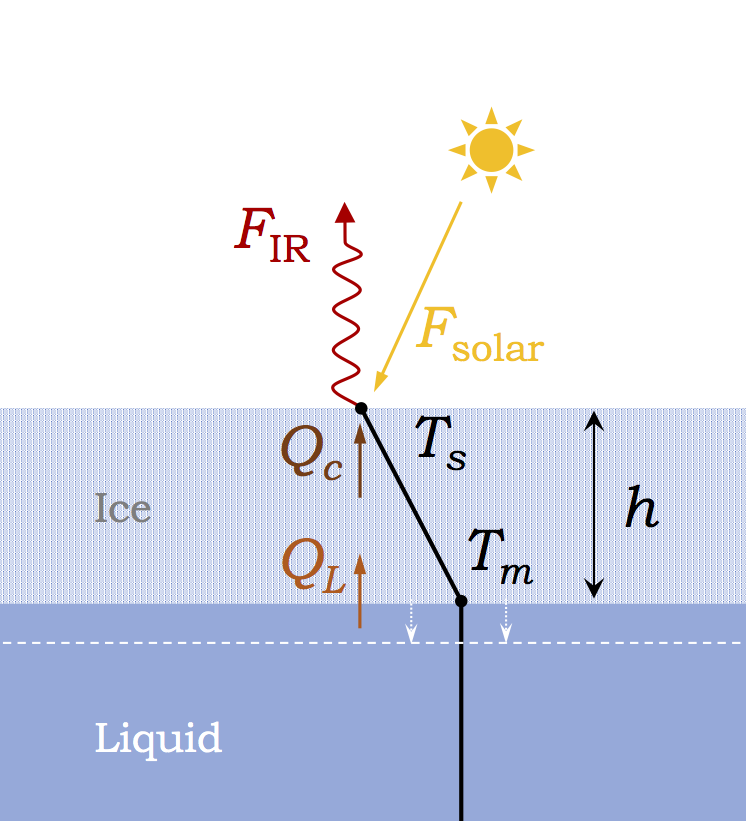

In [4]:
# Display schematic
from IPython.display import Image
Image(filename='/Users/phayne/research/europa/hotspots/europa_iceGrowth_diagram.png', width=250)

### Growth of ice on a liquid layer

The figure above depicts an idealized scenario, with an ice sheet overlying a deep reservoir of liquid at the melting point. Growth of the ice layer is determined by the loss of heat from its surface, balancing latent heating due to freezing at its base. At early times after melting, sublimation dominates the surface energy balance. After some time, cooling is dominated by thermal emission. We first consider this latter period, and then come back to the question of sublimation later.

When sublimation can be neglected, surface heat loss is by thermal radiation, $F_\textrm{IR} = \epsilon \sigma T_s^4$, where $\epsilon$ is the emissivity, $T_s$ is the surface temperature, and $\sigma$ is the Stefan-Boltzmann constant. Absorbed sunlight also contributes to the heat budget, $F_\textrm{solar} = (1-A)S\cos{\theta}/r_\textrm{AU}^2$, where $A$ is the surface albedo, $S$ is the solar constant (W m$^{-2}$), $\theta$ is the solar incidence angle, and $r_\textrm{AU}$ is the solar distance (AU). Heat conduction to the surface is $Q_c = k\partial T/\partial z \rvert_{z=0}$, where $k$ is the thermal conductivity at the surface (W m$^{-1}$ K$^{-1}$), and $z$ is depth. The surface energy balance can be written

\begin{equation}
     Q_c + F_\mathrm{solar} = F_\mathrm{IR}
\end{equation}

Latent heating at the base of the ice layer is $Q_L = \rho L \dot{h}$, where $h$ is the thickness of the ice, $\rho$ is its density (kg m$^{-3}$), and $L$ is the latent heat of fusion (J kg$^{-1}$). The skin depth of the diurnal thermal wave is  $z_s = \sqrt{\kappa P/\pi}$, where $P$ is the rotation period, and $\kappa = k/\rho c_p$ is the thermal diffusivity of the ice. If $h \gg z_s$, then diurnal temperature cycles do not propagate to the base of the ice layer. In this case, we consider $T_s(t)$ to be the temperature just beneath the diurnal wave.

#### Linearized model

The simplest approximation is that of a linear temperature gradient from $T_s$ to the melting temperature, $T_m$. In this case, $Q_c = Q_L$, and we have

\begin{equation}
    k\frac{T_m - T_s(t)}{h} = \rho L \dot{h}
\end{equation}

and the ice thickness is

\begin{equation}
    h^2(t) = \frac{2k}{\rho L}\int_0^t \left[T_m - T_s(t')\right]dt'
\end{equation}

This is the so-called Stefan solution, after its originator, [Josef Stefan](https://en.wikipedia.org/wiki/Josef_Stefan). In the case where the surface temperature is prescribed (e.g., $T_s(t) = \mathrm{const.}$), this equation can be integrated to obtain the ice thickness $h$ at a given time $t$. However, in our case, the surface temperature is unknown; in fact, this is the quantity we are after. <cite data-cite="5247136/MCEPHDC7"></cite> considered a similar scenario, for the cooling of lava lakes on Io. We follow their approach, which consists of two steps:

1. Solve the Stefan problem with a constant surface temperature condition, $T_s(t) \equiv T_0$
2. Apply the resulting conducted heat flux, $Q_c(t)$ to the surface energy balance and solve for $T_s(t)$

With a constant surface temperature $T_0$, Stefan's solution becomes

\begin{align}
    h(t) &= a_h t^{1/2} \\
    Q_c(t) &= a_Q t^{-1/2}
\end{align}

with

\begin{align}
    a_h &= \sqrt{\frac{2k(T_m - T_0)}{\rho L}} \\
    a_Q &= \frac{k}{a_h} (T_m-T_0)
\end{align}

In this analytical model, we then use these estimated quantities to solve equation (1) for the surface temperature:

\begin{equation}
    T_s(t) = \left( \frac{Q_c(t) + \langle F_\mathrm{solar} \rangle}{\epsilon \sigma} \right)^{1/4}
\end{equation}

where $\langle F_\mathrm{solar} \rangle = \frac{1}{4}(1-A)S\cos\phi/r_\textrm{AU}^2$ is the absorbed solar radiation averaged over one rotation, at latitude $\phi$.

#### Turcotte & Schubert's method

An analytical solution was obtained by <cite data-cite="5247136/PAYK4DBL"></cite>, without the simplifying assumption of a linear temperature profile in the solid layer. Making use of the error-function solution to the cooling of an infinite half-space, coefficients for this model are given by

\begin{align}
    a_h &= 2\sqrt{\kappa}\Lambda \\
    a_Q &= \frac{(T_m-T_0)I}{\sqrt{\pi}~\mathrm{erf}(\Lambda)}
\end{align}

and $I = \sqrt{k\rho c_p}$ is the thermal inertia. The parameter $\Lambda$ is the solution to the transcendental equation

\begin{equation}
    \alpha = \frac{e^{-\Lambda^2}}{\Lambda \sqrt{\pi}~\mathrm{erf}(\Lambda)}
\end{equation}

where $\alpha \equiv \frac{L}{c_p(T_m-T_0)}$ is the ratio of the latent heat of fusion to the sensible heat available from cooling. Solutions for $T_s(t)$ using the two formulations above differ by $\sim10$ K for times $<1$ yr, but converge to within a few degrees of each other for times $>10$ yr. In either case, the surface temperature is 

\begin{equation}
    T_s(t) = T_0 + a_T t^{-1/8}
\end{equation}

where $T_0 = (\langle F_\mathrm{solar} \rangle/\epsilon \sigma)^{1/4}$ is the equilibrium temperature, and

\begin{equation}
    a_T = \left(\frac{a_Q}{\epsilon \sigma}\right)^{1/4}
\end{equation}


---

In [5]:
# Function: ice_growth_model
def ice_growth_model(planet, T_m, latitude, t):
    # Constants:
    L = 3.34e5 # latent heat of fusion for H2O [J.kg-1]
    rho = 920.0 # density of ice [kg.m-3]
    k = 1.0 # thermal conductivity [W.m-1.K-1]
    cp = 900.0 # specific heat capacity [J.kg-1.K-1]
    kappa = k/(rho*cp) # thermal diffusivity [m2.s-1]
    emissivity = 0.90
    sigma = pr.sigma # Stefan-Boltzmann constant
    
    T_avg = planet.Tsavg * (np.cos(latitude*np.pi/180))**0.25
    F_solar = emissivity*sigma*T_avg**4
    
    # Temperature difference
    Delta_T = T_m - T_avg
    
    # Useful constants
    beta = k/(rho*L)
    alpha = L/(cp*Delta_T)
    
    # Turcotte and Schubert (2002) solution
    I = np.sqrt(k*rho*cp) # thermal inertia
    lam = solve_stefan_lambda(alpha)
    a_h = 2*np.sqrt(kappa)*lam
    a_Q = Delta_T*I/(np.sqrt(np.pi)*math.erf(lam))
    
    # Coefficents for thickness and heat flow
    #a_h = np.sqrt(2*beta*Delta_T)
    #a_Q = (k/a_h)*Delta_T
    
    # Calculate thickness, heat flow, and temperature
    h = a_h * t**0.5
    Q_c = a_Q * t**-0.5
    T_s = ((Q_c+F_solar)/(emissivity*sigma))**0.25
    
    return h, Q_c, T_s

# Function: solve_stefan_lambda
def solve_stefan_lambda(alpha):
    PREC = 1e-3 # precision
    LAM_MIN = 1e-3 # minimum expected value
    LAM_MAX = 10.0 # maximum expected value
    lam = np.arange(LAM_MIN, LAM_MAX, PREC)
    
    y = []
    for l in lam:
        y.append(np.exp(-l**2)/(l*np.sqrt(np.pi)*math.erf(l)))
    
    i = (np.abs(y-alpha)).argmin()
    
    return lam[i]

In [22]:
# Example
planet = planets.Europa
lat1 = 0.0
T_m = 273.0 # melting temperature [K]
#T_avg = 105.0 # average surface temp. [K]
t = np.logspace(-1,4,100)*np.pi*1e7
h, Q_c, T_s = ice_growth_model(planet, T_m, lat1, t)

lat2 = 65.0 # latitude in degrees
#T_avg_midlat = T_avg*(np.cos(lat_midlat))**0.25
h_midlat, Q_c_midlat, T_s_midlat = ice_growth_model(planet, T_m, lat2, t)

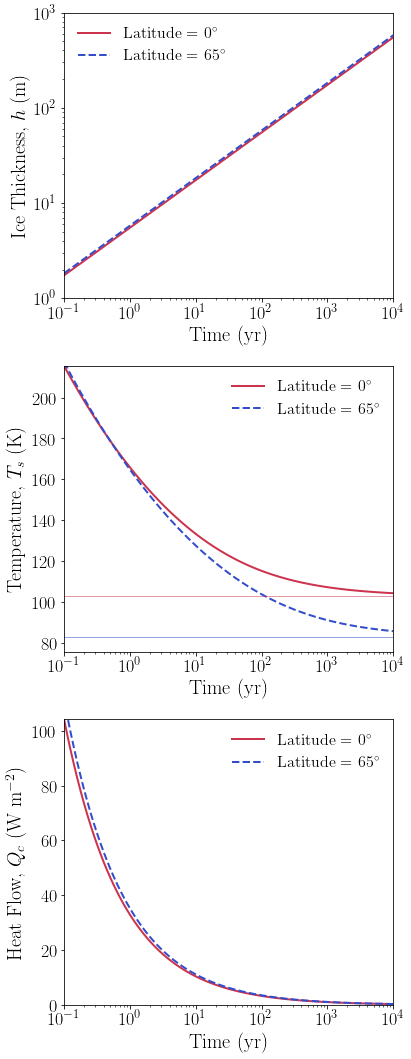

In [32]:
# Plot results
tp = t/(np.pi*1e7)
fig = plt.figure(figsize=[6,15])
c1 = [0.8,0.2,0.3] # first color
c2 = [0.2,0.3,0.8] # second color

# Ice thickness
sub1 = fig.add_subplot(311)
sub1.loglog(tp, h, label='Latitude = {:d}$^\circ$'.format(np.int(lat1)), color=c1)
sub1.loglog(tp, h_midlat, '--', label='Latitude = {:d}$^\circ$'.format(np.int(lat2)), color=c2)
sub1.set_xlabel('Time (yr)')
sub1.set_ylabel('Ice Thickness, $h$ (m)')
sub1.set_ylim([1,1e3])
sub1.set_xlim([.1,1e4])
sub1.legend(frameon=False)

# Temperature
sub2 = fig.add_subplot(312)
tplot1 = sub2.semilogx(tp, T_s, label='Latitude = {:d}$^\circ$'.format(np.int(lat1)), color=c1)
tplot2 = sub2.semilogx(tp, T_s_midlat, '--', label='Latitude = {:d}$^\circ$'.format(np.int(lat2)), color=c2)
sub2.set_xlabel('Time (yr)')
sub2.set_ylabel('Temperature, $T_s$ (K)')
sub2.set_ylim([T_s_midlat.min()-10,T_s.max()])
sub2.set_xlim([.1,1e4])
sub2.legend(frameon=False)
# Plot background temperatures
xlim = sub2.get_xlim()
xx = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 10)
yy = xx*0 + planet.Tsavg
sub2.semilogx(xx, yy, '-', linewidth=0.5, color=[0.8,0.2,0.3])
yy = xx*0 + planet.Tsavg*(np.cos(lat2*np.pi/180))**0.25
sub2.semilogx(xx, yy, '-k', linewidth=0.5, color=[0.2,0.3,0.8])
#sub2.yaxis.tick_right()
#sub2.yaxis.set_label_position('right')

# Heat flow
sub3 = fig.add_subplot(313)
sub3.semilogx(tp, Q_c, label='Latitude = {:d}$^\circ$'.format(np.int(lat1)), color=c1)
sub3.semilogx(tp, Q_c_midlat, '--', label='Latitude = {:d}$^\circ$'.format(np.int(lat2)), color=c2)
sub3.set_xlabel('Time (yr)')
sub3.set_ylabel('Heat Flow, $Q_c$ (W m$^{-2}$)')
sub3.set_ylim([0,Q_c.max()])
sub3.set_xlim([.1,1e4])
sub3.legend(frameon=False)
plt.tight_layout()
plt.savefig(figdir+'/europa_ice_growth_h_t_q.pdf',bbox_inches='tight')
plt.show()

#### Sublimation

At the surface of the ice, sublimation removes latent heat at a rate proportional to the equilibrium vapor pressure, $p_v(T_s)$,

\begin{equation}
    Q_s = L\dot{m} = L p_v(T_s)\left(\frac{\mu}{2\pi k_B T_s}\right)^{1/2}
\end{equation}

where $\mu$ is mass of one molecule, and $k_B$ is the Boltzmann constant.

Accounting for latent heat removal by sublimation is not straightforward in the analytic model, since sublimation rate depends so sensitively on surface temperature. As shown below, $Q_s$ is dominant for $T_s \gtrsim 200$ K.

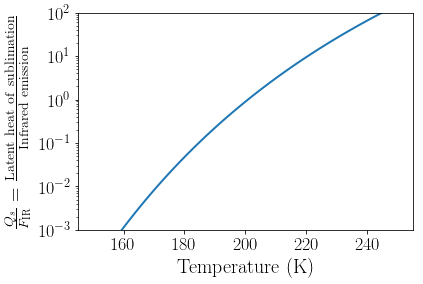

In [8]:
# Comparing sublimation heat loss to IR
T = np.linspace(150,250,100)
L = 3.34e5 # latent heat of fusion for H2O [J.kg-1]
emissivity = 0.90
sigma = pr.sigma # Stefan-Boltzmann constant

F_IR = emissivity*sigma*T**4
Q_s = L*pt.h2oSublimationRate(T)

plt.semilogy(T, Q_s/F_IR)
plt.ylim([1e-3,1e2])
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\frac{Q_s}{F_\mathrm{IR}} = \frac{\mathrm{Latent~heat~of~sublimation}}{\mathrm{Infrared~emission}}$')
plt.show()


During the period when $T_s \gtrsim 200$ K, sublimation dominates the energy budget. It is clear that insolation can be neglected during this period. Latent heat loss and infrared emission balance the heat flow through the ice layer:

\begin{align}
    k\frac{\partial T}{\partial z}\Big\vert_{z=0} &\approx L p_v(T_s)\left(\frac{\mu}{2\pi k_B T_s}\right)^{1/2} + \epsilon \sigma T_s^4
\end{align}

This boundary condition can be applied to the 1-d numerical model to solve for the surface temperature. At each time step, the ice thickness and heat flow can be incremented using the Stefan solution derived previously.

We can estimate the timescale during which sublimation dominates the heat budget. Cooling a thin layer $\Delta z$ by $\Delta T$ requires an amount of time

\begin{equation}
    t \sim \Delta z \frac{\rho c_p \Delta T}{L\dot{m}}
\end{equation}

Setting the layer thickness equal to the thermal diffusion scale, $\Delta z \sim \sqrt{\kappa t}$,

\begin{equation}
    t \sim \kappa \left( \frac{\rho c_p \Delta T}{L\dot{m}} \right)^2
\end{equation}

The plot below shows that this timescale varies from milliseconds to minutes over the relevant temperature range, $\sim$ 260 to 200 K.

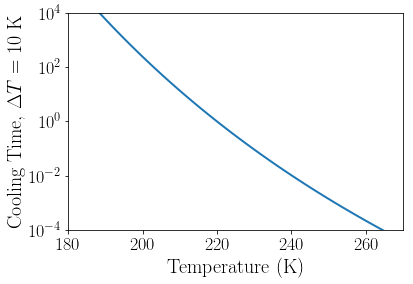

In [9]:
# Timescale for cooling by sublimation
rho = 970.0 # density [kg.m-3]
cp = 900.0 # heat capacity [J.kg.K-1]
k = 1.0 # thermal conductivity [W.m-1.K-1]
kappa = k/(rho*cp) # thermal diffusivity [m2.s-1]
L = 2.8e6 # latent heat of sublimation for H2O [J.kg-1]
T0 = 180.0 # final temperature (negligible sublimation) [K]

# Temperature change
dT = 10.0

T = np.linspace(T0,273,100)
t = kappa*( rho*cp*dT/(L*pt.h2oSublimationRate(T)) )**2

timescale_plot = plt.semilogy(T, t)
plt.xlim([180,270])
plt.ylim([1e-4,1e4])
plt.xlabel('Temperature (K)')
plt.ylabel('Cooling Time, $\Delta T = 10$ K')
plt.show()

### Frictional heating on faults

Text.


In [10]:
#automatic document conversion to markdown and then to pdf
#first convert the ipython notebook to markdown
!jupyter nbconvert --to markdown Europa_Thermal_Anomalies.ipynb
#next convert markdown to pdf
!pandoc -s Europa_Thermal_Anomalies.md -t latex -o Europa_Thermal_Anomalies.pdf --filter pandoc-citeproc --bibliography="/Users/phayne/anaconda3/envs/planets/planet.bib" --csl="/Users/phayne/anaconda3/envs/planets/jgr.csl"

[NbConvertApp] Converting notebook Europa_Thermal_Anomalies.ipynb to markdown
[NbConvertApp] Support files will be in Europa_Thermal_Anomalies_files/
[NbConvertApp] Making directory Europa_Thermal_Anomalies_files
[NbConvertApp] Making directory Europa_Thermal_Anomalies_files
[NbConvertApp] Making directory Europa_Thermal_Anomalies_files
[NbConvertApp] Making directory Europa_Thermal_Anomalies_files
[NbConvertApp] Writing 15224 bytes to Europa_Thermal_Anomalies.md
pandoc-citeproc: Error parsing XML file /Users/phayne/anaconda3/envs/planets/jgr.csl: FailedConnectionException2 "www.zotero.org" 80 False getAddrInfo: does not exist (nodename nor servname provided, or not known)
pandoc: Error running filter pandoc-citeproc
Filter returned error status 1


## References
<div class="cite2c-biblio"></div>